In [7]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [8]:
#load mnist dataset from keras
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
#normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [10]:
train_images[0].shape

(28, 28)

In [11]:
#Define the neural network model structure
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [12]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
#train the model for 20 epochs
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4958 - accuracy: 0.8241
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3717 - accuracy: 0.8659
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3363 - accuracy: 0.8768
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3093 - accuracy: 0.8870
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2903 - accuracy: 0.8931
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2796 - accuracy: 0.8952
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2651 - accuracy: 0.9006
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2554 - accuracy: 0.9043
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2448 - accuracy: 0.9075
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2

In [14]:
#evaluate the model
result = model.evaluate(test_images, test_labels)
print("Evaluation results:")
print("Loss:", result[0])
print("Accuracy:", result[1]*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.3588 - accuracy: 0.8880
Evaluation results:
Loss: 0.3587530851364136
Accuracy: 88.80000114440918


In [15]:
#make predictions
prediction = model.predict(test_images)
predicted_labels = np.argmax(prediction, axis=1)

313/313 [==============================] - 1s 3ms/step


In [16]:
prediction

array([[2.42553672e-10, 4.11275789e-15, 2.15662731e-12, ...,
        2.26109587e-05, 1.57459410e-11, 9.99966562e-01],
       [7.37675146e-05, 2.76590880e-15, 9.99810219e-01, ...,
        1.11275997e-14, 3.23298918e-12, 1.68401681e-19],
       [1.47696815e-08, 9.99999940e-01, 4.00898065e-10, ...,
        1.73355489e-31, 6.10497099e-14, 3.07896662e-18],
       ...,
       [6.95496327e-10, 1.15146638e-16, 2.97925330e-11, ...,
        4.36047174e-14, 9.99999821e-01, 7.08826701e-18],
       [3.66474140e-09, 9.99999106e-01, 1.84229611e-11, ...,
        5.21929964e-20, 2.31317021e-10, 8.35358096e-13],
       [5.54280859e-07, 5.53687207e-10, 1.53391504e-08, ...,
        1.28425367e-04, 3.10481732e-06, 4.63034633e-09]], dtype=float32)

In [17]:
predicted_labels

array([9, 2, 1, ..., 8, 1, 5])

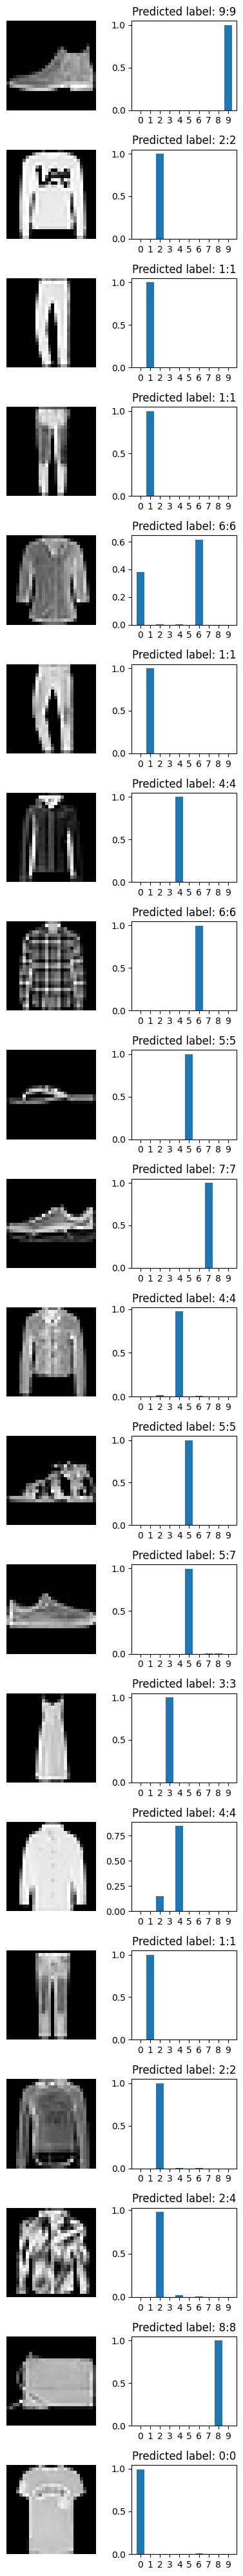

In [18]:
#visualize prediction
images = 20
plt.figure(figsize=(4, 2*images))

for i in range(images):
    plt.subplot(images, 2, 2*i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')

    plt.subplot(images, 2, 2*i+2)
    plt.bar(range(10), prediction[i])
    plt.xticks(range(10))
    plt.title(f"Predicted label: {predicted_labels[i]}:{test_labels[i]}")
    plt.tight_layout()

plt.show()